# 상관관계 분석
### 이해정도 95% _0601

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np


csv_file_path = '/content/young_survey.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv('/content/young_survey.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school


## 연습문제2. 상관관계

In [2]:
df.corr()

<ipython-input-2-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
Music,1.000000,0.075426,0.066719,0.027648,-0.014272,0.055648,0.056730,0.059967,0.149958,0.016043,...,0.093707,0.016673,0.043828,0.091142,0.014790,0.073037,-0.078058,-0.068002,-0.128233,-0.011585
Slow songs or fast songs,0.075426,1.000000,0.188217,-0.062023,-0.072138,-0.159021,-0.078479,0.054375,-0.018347,0.050913,...,0.064778,0.002680,0.106225,0.024667,0.036608,-0.027398,0.010998,0.106873,0.125870,0.002352
Dance,0.066719,0.188217,1.000000,0.065863,0.055106,-0.093125,0.067430,0.424794,-0.147867,-0.241477,...,0.189977,0.053353,0.078635,0.184652,0.078517,0.026210,0.031215,-0.012681,0.014024,0.003952
Folk,0.027648,-0.062023,0.065863,1.000000,0.391850,0.366988,0.263987,0.023641,0.056471,0.062454,...,-0.069797,-0.129808,-0.099580,-0.121036,-0.155832,-0.013442,0.132414,-0.076549,-0.013412,0.089963
Country,-0.014272,-0.072138,0.055106,0.391850,1.000000,0.257474,0.202831,0.000716,0.129917,0.115289,...,-0.071510,-0.057090,-0.065920,-0.095447,0.000729,0.007146,0.074586,0.024685,0.073452,0.035615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spending on healthy eating,0.073037,-0.027398,0.026210,-0.013442,0.007146,0.077416,0.064933,-0.025233,0.030247,-0.005333,...,0.106373,0.178066,0.148477,0.237851,0.243666,1.000000,0.015248,0.019720,0.029572,-0.082342
Age,-0.078058,0.010998,0.031215,0.132414,0.074586,0.035176,0.014553,0.020440,-0.000670,0.004109,...,-0.133800,-0.066627,-0.032284,-0.073129,-0.012082,0.015248,1.000000,0.122711,0.238893,0.089174
Height,-0.068002,0.106873,-0.012681,-0.076549,0.024685,-0.005057,-0.240144,-0.133551,-0.024931,0.116562,...,-0.136491,0.146116,0.165349,-0.089903,0.235986,0.019720,0.122711,1.000000,0.735923,-0.005442
Weight,-0.128233,0.125870,0.014024,-0.013412,0.073452,0.010132,-0.152645,-0.093742,0.007529,0.168364,...,-0.151023,0.101246,0.141377,-0.085356,0.244790,0.029572,0.238893,0.735923,1.000000,-0.026374


In [6]:
#loc, iloc 복슴필요
df.corr().loc['Musical instruments', 'Writing']

<ipython-input-6-7d586aa58d16>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc['Musical instruments', 'Writing']


0.3438162143904336

## 클러스터 분석

### 사내 동아리를 만들어 보자



In [7]:
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school


In [9]:
# 모든 로우에 대한 History 컬럼부터 Pets 컬럼까지 
# interest 변수에 넣어준다.

interest = df.loc[:, 'History': 'Pets']
interest

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,4.0,4.0,2.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,...,4.0,4.0,2.0,4.0,5.0,3.0,5.0,5.0,4.0,4.0
993,4.0,1.0,1.0,5.0,4.0,5.0,5.0,2.0,2.0,1.0,...,1.0,5.0,5.0,1.0,2.0,5.0,1.0,5.0,1.0,5.0
994,2.0,3.0,3.0,3.0,1.0,3.0,4.0,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,2.0,3.0,2.0,3.0,1.0,5.0
995,3.0,5.0,3.0,1.0,1.0,5.0,4.0,3.0,3.0,3.0,...,2.0,4.0,1.0,3.0,5.0,5.0,5.0,5.0,1.0,4.0


In [11]:
interest_corr = interest.corr()
interest_corr

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
History,1.000000,0.281493,0.400845,0.008328,0.079638,0.022010,0.027346,0.054872,0.014807,0.014117,...,-0.013262,0.064929,0.033196,-0.087338,-0.061804,0.135597,0.185301,0.024960,0.061201,0.031920
Psychology,0.281493,1.000000,0.195338,0.043030,0.065774,0.000075,-0.077712,0.087072,0.202913,0.058541,...,-0.083949,0.006261,0.042099,-0.012857,0.058210,0.060809,0.268484,0.020027,0.058522,0.053322
Politics,0.400845,0.195338,1.000000,0.104033,0.130293,0.058863,0.088846,0.304575,-0.090532,-0.058849,...,0.042173,0.069026,-0.018266,-0.023371,-0.064327,0.186743,0.085306,0.009968,0.090355,-0.055446
Mathematics,0.008328,0.043030,0.104033,1.000000,0.595188,0.157779,0.295564,0.218796,0.078043,0.181953,...,0.055701,0.083826,0.031867,-0.111193,-0.156334,0.249863,-0.018890,-0.030492,0.098004,-0.031633
Physics,0.079638,0.065774,0.130293,0.595188,1.000000,0.103793,0.339429,0.010678,0.212261,0.322827,...,0.016199,0.118929,0.047723,-0.211790,-0.227379,0.430393,0.001382,-0.029794,0.146055,-0.022982
Internet,0.022010,0.000075,0.058863,0.157779,0.103793,1.000000,0.467867,0.164447,-0.101429,-0.107657,...,0.171394,0.009498,-0.049947,0.114478,0.086552,0.190400,-0.149085,0.108927,0.072552,0.006894
PC,0.027346,-0.077712,0.088846,0.295564,0.339429,0.467867,1.000000,0.155285,-0.083648,-0.042937,...,0.080169,0.127505,-0.005789,-0.050504,-0.162955,0.420528,-0.177682,0.004907,0.154008,-0.066745
Economy Management,0.054872,0.087072,0.304575,0.218796,0.010678,0.164447,0.155285,1.000000,-0.173794,-0.180850,...,0.049986,0.071795,-0.045067,0.090132,0.111786,0.060767,-0.009515,0.066244,0.126719,-0.061738
Biology,0.014807,0.202913,-0.090532,0.078043,0.212261,-0.101429,-0.083648,-0.173794,1.000000,0.689980,...,-0.011216,0.055579,0.268927,0.012611,0.090339,0.151654,0.168296,0.013397,0.039657,0.169852
Chemistry,0.014117,0.058541,-0.058849,0.181953,0.322827,-0.107657,-0.042937,-0.180850,0.689980,1.000000,...,-0.041194,0.042481,0.200144,-0.083627,0.002447,0.195571,0.098171,-0.024690,0.035784,0.106649


In [15]:
interest_corr['History'].sort_values(ascending=False)

History                   1.000000
Politics                  0.400845
Geography                 0.327354
Law                       0.298363
Psychology                0.281493
Reading                   0.262948
Religion                  0.203840
Art exhibitions           0.200643
Theatre                   0.185301
Writing                   0.164617
Foreign languages         0.145471
Science and technology    0.135597
Musical instruments       0.107279
Countryside, outdoors     0.096609
Physics                   0.079638
Active sport              0.064929
Adrenaline sports         0.061201
Economy Management        0.054872
Cars                      0.050644
Medicine                  0.040023
Gardening                 0.033196
Dancing                   0.032925
Pets                      0.031920
PC                        0.027346
Fun with friends          0.024960
Internet                  0.022010
Biology                   0.014807
Chemistry                 0.014117
Mathematics         

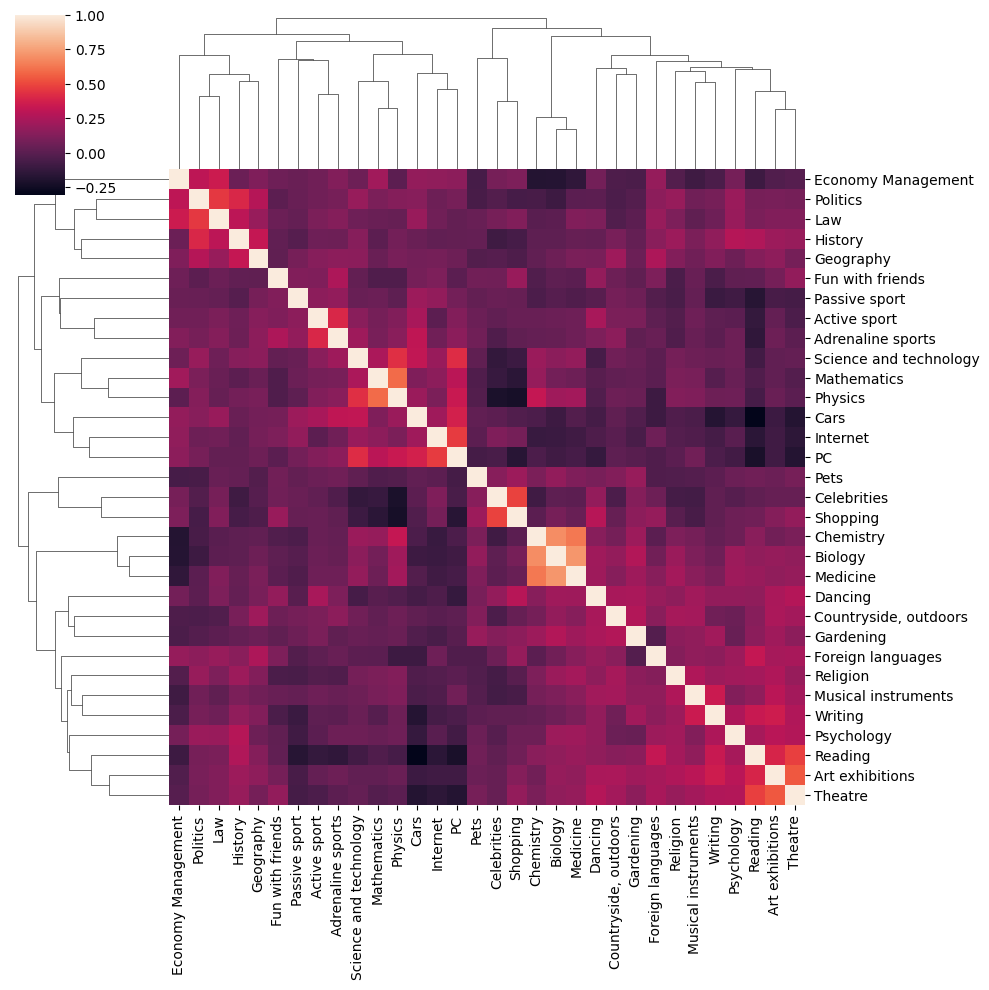

In [22]:
sns.clustermap(interest_corr)

## 연습문제

In [23]:
# column 은 'Horror' 부터 'Action' 까지. 영화 장르에 대해서 clustermap 을 그려보자

In [24]:
# 1. horror 부터 Action 까지 컬럼의 범위를 지정하고
# 2. 새로운 데이터 프레임 생성
# 3. interest_df 라는 변수에

interest_df = df.loc[:, 'Horror':'Action']
interest_df

,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0
1,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0
2,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0
3,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0
4,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
992,2.0,3.0,4.0,5.0,4.0,2.0,5.0,5.0,2.0,1.0,4.0
993,2.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,2.0,5.0
994,5.0,5.0,3.0,5.0,2.0,1.0,4.0,4.0,3.0,1.0,3.0
995,3.0,4.0,5.0,3.0,1.0,2.0,5.0,5.0,3.0,1.0,4.0


In [27]:
# 1. 새로운 데이터프레임 interest_df를  corr() 즉 상관관계연산을 한다.
# 2. corr()로 상관관계연산을 한 값을 interest_corr1 값에 넣어준다
# 3. *interest_corr1 을 하지않고 df.loc[:, 'Horror':'Action'].corr() 을해도 관계가 없다.
interest_corr1 = interest_df.corr()
interest_corr1 

,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
Horror,1.000000,0.503069,0.098243,-0.128117,0.165834,0.136508,-0.087150,0.004865,-0.063749,0.078845,0.129958
Thriller,0.503069,1.000000,-0.008975,-0.164751,0.230838,0.220754,-0.090075,-0.025239,0.046558,0.124719,0.278214
Comedy,0.098243,-0.008975,1.000000,0.286236,0.040425,-0.077274,0.211025,0.180246,-0.007444,-0.033091,0.121256
Romantic,-0.128117,-0.164751,0.286236,1.000000,-0.097219,-0.193751,0.349432,0.239951,-0.083895,-0.126574,-0.181823
Sci-fi,0.165834,0.230838,0.040425,-0.097219,1.000000,0.274634,-0.009158,0.068642,0.141714,0.276898,0.363429
War,0.136508,0.220754,-0.077274,-0.193751,0.274634,1.000000,-0.072474,-0.026996,0.235355,0.396669,0.299257
Fantasy/Fairy tales,-0.087150,-0.090075,0.211025,0.349432,-0.009158,-0.072474,1.000000,0.679270,0.140227,-0.023267,-0.051591
Animated,0.004865,-0.025239,0.180246,0.239951,0.068642,-0.026996,0.679270,1.000000,0.148375,-0.003069,0.019379
Documentary,-0.063749,0.046558,-0.007444,-0.083895,0.141714,0.235355,0.140227,0.148375,1.000000,0.263859,0.131062
Western,0.078845,0.124719,-0.033091,-0.126574,0.276898,0.396669,-0.023267,-0.003069,0.263859,1.000000,0.320005


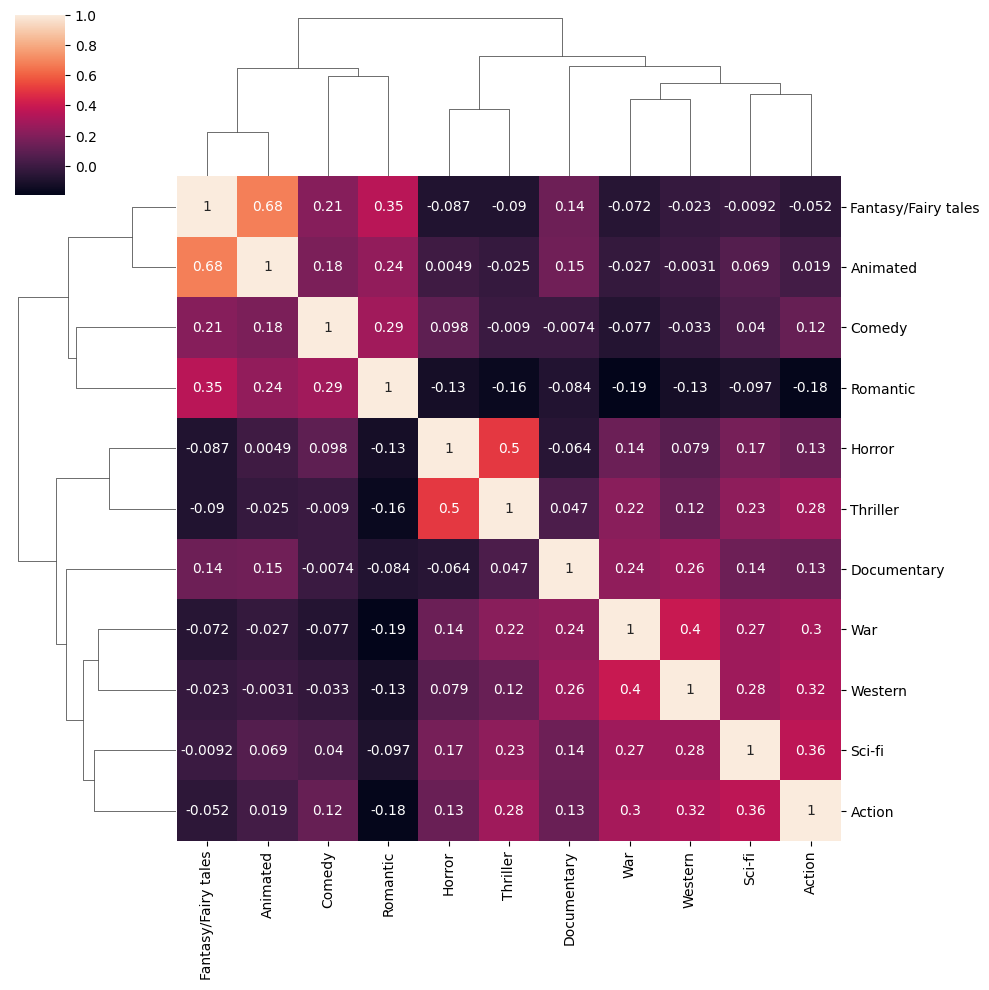

In [31]:
# 상관관계분석 annot = True로 숫자표시 보기쉽게함.
sns.clustermap(interest_corr1, annot=True)

# 연습문제 2 (타이타닉)

- 생존 여부는 'Survived' 컬럼 0은 사망 1은 생존
- 좌석등급은 'Pclass' 컬럼 1 , 2,  3 == 1등실, 2등실, 3등실
- 지불 요금은 'Fare' 컬럼에 저장.


In [36]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

csv_file_path = '/content/titanic.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 연습문제 풀기전 기초 

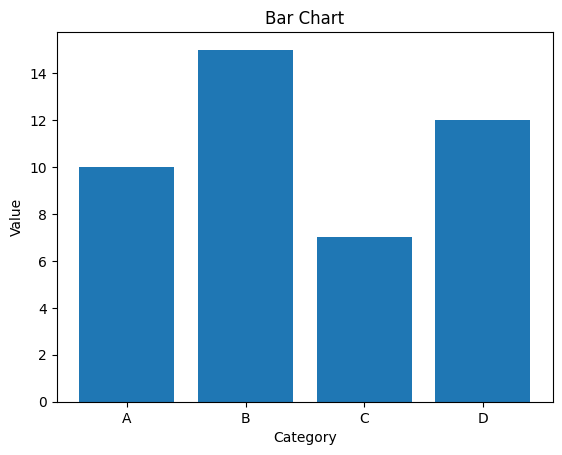

In [38]:
import matplotlib.pyplot as plt

# 데이터
x = ['A', 'B', 'C', 'D']
y = [10, 15, 7, 12]

# 막대 그래프 그리기
plt.bar(x, y)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Bar Chart')
plt.show()


## 타이타닉 1) 나이 분포도 그려보기

(array([ 44.,  24.,  32., 104., 115., 127.,  80.,  59.,  49.,  30.,  22.,
         17.,   4.,   6.,   1.]),
 array([ 0.42      ,  5.72533333, 11.03066667, 16.336     , 21.64133333,
        26.94666667, 32.252     , 37.55733333, 42.86266667, 48.168     ,
        53.47333333, 58.77866667, 64.084     , 69.38933333, 74.69466667,
        80.        ]),
 <BarContainer object of 15 artists>)

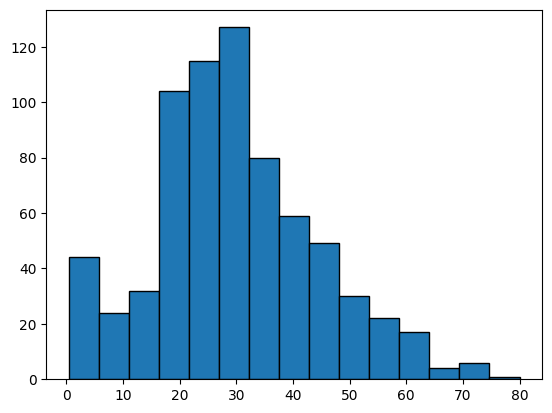

In [44]:
# 1. Age 열(컬럼)을 뽑아 새로운 데이터프레임 생성
# 2. dropna() 사용해서 결측지 제거

plt.hist(df.loc[:, 'Age'].dropna(), bins= 15, edgecolor= 'black')

In [49]:
plt.bar(x = df['Age'], y = df['Fare'])

# plt.hist(df['Fare'].dropna(), bins = 20, edgecolor ='black')

TypeError: ignored